In [1]:
.libPaths('B:/codework/study/renv/library/R-4.0/x86_64-w64-mingw32')
options(repr.plot.width=14, repr.plot.height=6)
require('tidyr')
require('ggplot2')

Loading required package: tidyr

Loading required package: ggplot2



In [2]:
wuhan2015 <- read.csv('./input/武汉2015.csv',col.names = c('Date', 'AQI', 'level', 'PM25', 'PM10', 'SO2', 'CO', 'NO2', 'O3_8h'))
wuhan2015$index <- as.integer(rownames(wuhan2015))

In [3]:
head(wuhan2015)
summary(wuhan2015)

,Date,AQI,level,PM25,PM10,SO2,CO,NO2,O3_8h,index
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,2015-01-02,110,轻度污染,83,144,56,1.4,79,20,1
2,2015-01-03,144,轻度污染,110,182,43,1.6,89,44,2
3,2015-01-04,176,中度污染,133,216,70,1.9,117,37,3
4,2015-01-05,203,重度污染,153,169,62,1.8,95,15,4
5,2015-01-06,285,重度污染,235,119,45,2.4,69,19,5
6,2015-01-07,168,中度污染,128,152,31,2.0,69,41,6


     Date                AQI           level                PM25       
 Length:363         Min.   : 23.0   Length:363         Min.   : 11.00  
 Class :character   1st Qu.: 68.5   Class :character   1st Qu.: 41.50  
 Mode  :character   Median : 97.0   Mode  :character   Median : 57.00  
                    Mean   :103.3                      Mean   : 68.62  
                    3rd Qu.:127.5                      3rd Qu.: 84.00  
                    Max.   :334.0                      Max.   :284.00  
      PM10            SO2              CO             NO2        
 Min.   :  4.0   Min.   : 6.00   Min.   :0.400   Min.   : 13.00  
 1st Qu.: 66.5   1st Qu.:13.00   1st Qu.:0.900   1st Qu.: 34.50  
 Median : 98.0   Median :17.00   Median :1.100   Median : 46.00  
 Mean   :105.0   Mean   :19.86   Mean   :1.107   Mean   : 49.59  
 3rd Qu.:137.0   3rd Qu.:24.00   3rd Qu.:1.300   3rd Qu.: 60.00  
 Max.   :333.0   Max.   :70.00   Max.   :2.700   Max.   :119.00  
     O3_8h            index      


In [4]:
lr1 <- lm(formula = PM25~index,data = wuhan2015)
summary(lr1)


Call:
lm(formula = PM25 ~ index, data = wuhan2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.386 -28.886  -9.448  15.396 229.053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.83923    4.32277  19.163  < 2e-16 ***
index       -0.07813    0.02058  -3.796 0.000173 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.09 on 361 degrees of freedom
Multiple R-squared:  0.03838,	Adjusted R-squared:  0.03571 
F-statistic: 14.41 on 1 and 361 DF,  p-value: 0.0001726


In [5]:
lr2 <- lm(formula = PM25~index+I(index^2),data = wuhan2015)
summary(lr2)


Call:
lm(formula = PM25 ~ index + I(index^2), data = wuhan2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.837 -18.613  -2.811  15.101 176.057 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.426e+02  4.971e+00   28.68   <2e-16 ***
index       -1.060e+00  6.306e-02  -16.81   <2e-16 ***
I(index^2)   2.698e-03  1.678e-04   16.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.39 on 360 degrees of freedom
Multiple R-squared:  0.4403,	Adjusted R-squared:  0.4372 
F-statistic: 141.6 on 2 and 360 DF,  p-value: < 2.2e-16


In [6]:
lr3 <- lm(formula = PM25~index+I(index^2)+I(index^3),data = wuhan2015)
summary(lr3)


Call:
lm(formula = PM25 ~ index + I(index^2) + I(index^3), data = wuhan2015)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.369 -18.408  -2.978  15.053 174.810 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.410e+02  6.668e+00  21.143  < 2e-16 ***
index       -1.008e+00  1.584e-01  -6.362 6.08e-10 ***
I(index^2)   2.339e-03  1.011e-03   2.315   0.0212 *  
I(index^3)   6.564e-07  1.825e-06   0.360   0.7193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.43 on 359 degrees of freedom
Multiple R-squared:  0.4405,	Adjusted R-squared:  0.4358 
F-statistic: 94.22 on 3 and 359 DF,  p-value: < 2.2e-16


In [7]:
AIC(lr1)
AIC(lr2)
AIC(lr3)

[1] 3731.875

[1] 3537.398

[1] 3539.267

In [9]:
sqrt(mean(lr1$residuals^2))
sqrt(mean(lr2$residuals^2))
sqrt(mean(lr3$residuals^2))

[1] 40.98151

[1] 31.26475

[1] 31.25912

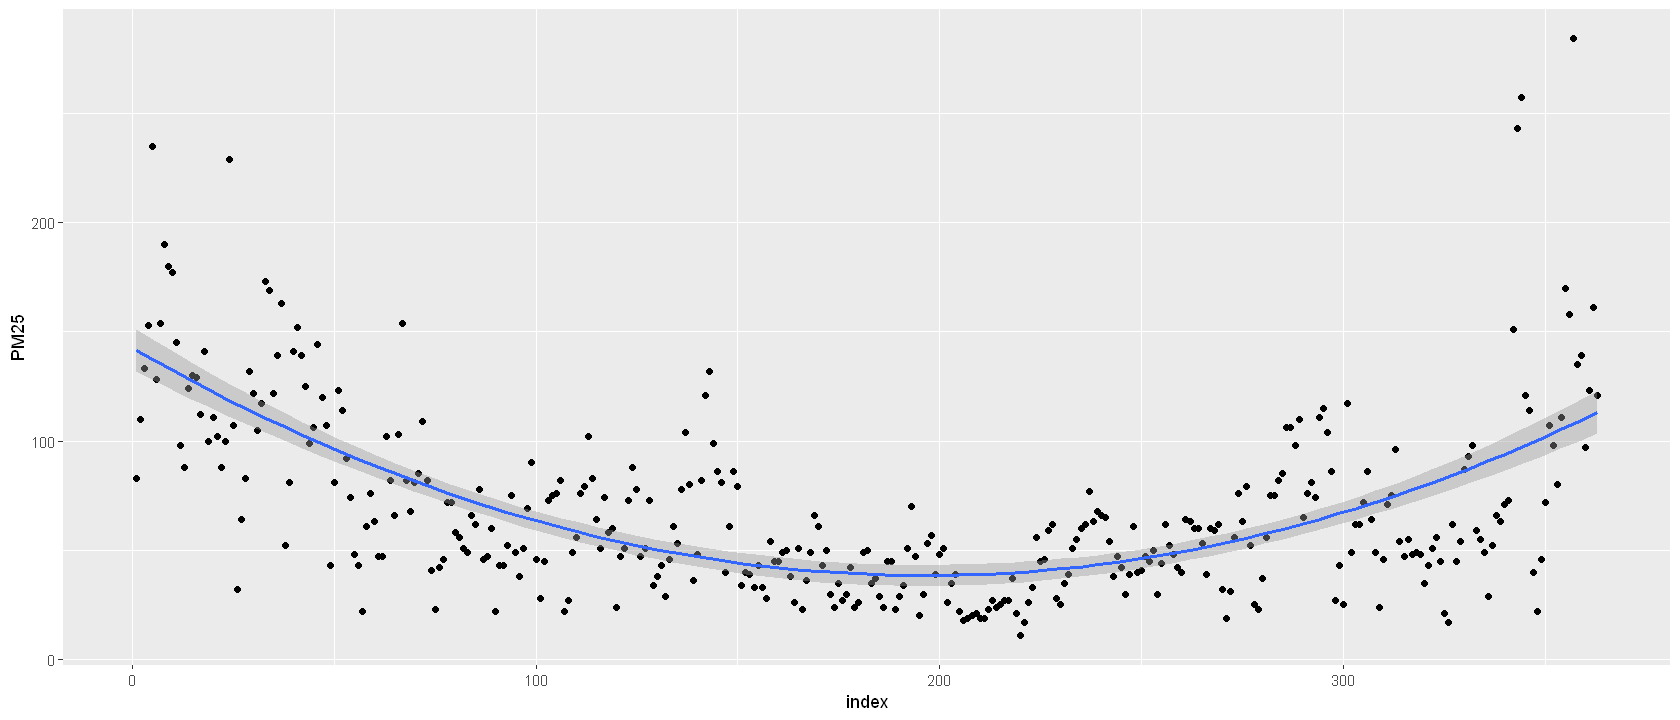

In [8]:
ggplot(wuhan2015,aes(index, PM25)) +
    geom_point()+
    geom_smooth(method='lm', formula= y~x+I(x^2))